# Marijuana

Marijuana/Hash questions in the survey was on either smoked marijuana or cooked in food.

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [3]:
case_quest_data = dataset.ix[:,0:2].copy()
marijuana = dataset.ix[:,'MJEVER':'MR30EST'].copy() # marijuana dataset

In [4]:
# This function splits our data frame in predifined age groups
def cutDF(df):
    return pd.cut(
        df,[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

* How many cases use the drug?

Almost half of the data set tried marijuana/hash.

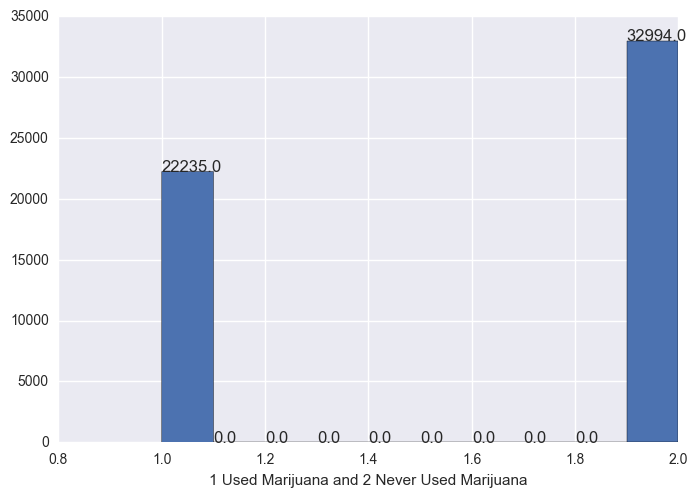

In [15]:
# extract how many ever used the drug
marijuana_ever = marijuana.ix[(marijuana['MJEVER'] < 3)].copy()
ax = marijuana_ever['MJEVER'].hist()
plt.xlabel('1 Used Marijuana and 2 Never Used Marijuana')

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

* What are their age range?

Similar to other drugs, the age range that tends to try or use marijuana are those aging from 10 to 20 years old.

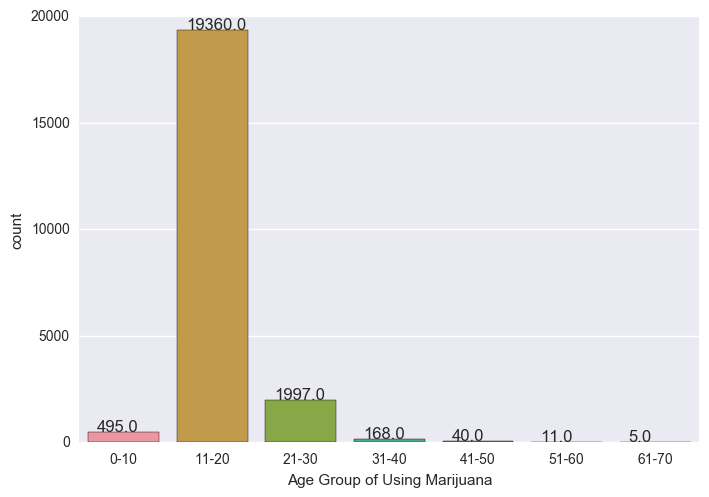

In [14]:
# extract the age range of those who ever used the drug
age_data = marijuana_ever.ix[(marijuana_ever['MJAGE'] < 90)].copy()
age_data['AgeGroup'] = age_data[['MJAGE']].apply(cutDF)
ax = sns.countplot(x=age_data['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of Using Marijuana')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* How frequently they use it?

From the below plot, it shows that ages from 30 and older do not usually use marijuana frequently like younger ages and ages less than 25 tend to use marijuana for the past 30 days before conducting the survey.

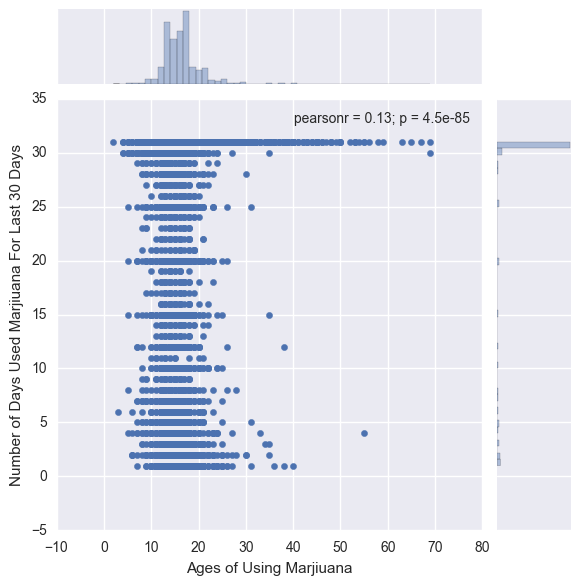

In [13]:
# number of days used the drug for the last 30 days
estHowMany = age_data.ix[(age_data['MJDAY30A'] < 31) | (age_data['MJDAY30A'] == 93)].copy()
estHowMany['MJDAY30A'] = estHowMany.ix[:,'MJDAY30A'].replace(to_replace=93, value=31)
sns.jointplot(x=estHowMany['MJAGE'],y=estHowMany['MJDAY30A']).set_axis_labels("Ages of Using Marjiuana", "Number of Days Used Marjiuana For Last 30 Days");

* Did they stop and go back to it? Are they planning to quit?

As could be shown below, most of those who tried or used marijuana did not use it for more than 12 months and only some continued using it.

1 = Within the past 30 days <br/>
2 = More than 30 days ago but within the past 12 mos <br/>
3 = More than 12 months ago <br/>

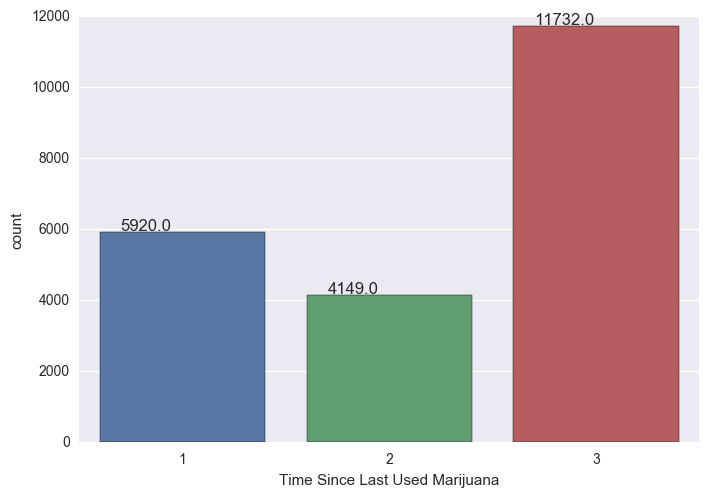

In [16]:
lastUsed = age_data.ix[(age_data['MJREC'] < 5)].copy()
ax = sns.countplot(lastUsed['MJREC'])
plt.xlabel('Time Since Last Used Marijuana')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Heroin](Heroin.ipynb)